<a href="https://colab.research.google.com/github/shivam-kislay/Python-Codes/blob/master/ShivamKislayAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS 6421 Assignment**
*****Declaration*****

> I Shivam Kislay student number 119220420 declare that, all of the work is my own, that I did not seek whole or partial solutions for any part of my submission from others; and that I did not and will not discuss, exchange, share, or publish complete or partial solutions for this exam or any part of it.


**Install Libraries**

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

TensorFlow version: 2.2.0-rc2
Is Executing Eagerly? True


# **Assignment Part 1**

### **Dense Layer Models**

**Encoder**

Single Hidden Layer Encoder

In [0]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

Two Hidden Layer Encoder

In [0]:
class Encoder_two(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_two, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= (intermediate_dim / 2), activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=(intermediate_dim / 2), activation=tf.nn.relu)
    
    def call(self, input_features):
        layer1 = self.hidden_layer(input_features)
        activation = self.hidden_layer2(layer1)
        return self.output_layer(activation)

Three Hidden layer Encoder

In [0]:
class Encoder_three(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_three, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu, dtype = 'float32')
        self.hidden_layer2 = tf.keras.layers.Dense(units= (intermediate_dim / 2), activation=tf.nn.relu, dtype = 'float32')
        self.hidden_layer3 = tf.keras.layers.Dense(units= ((intermediate_dim / 2) / 2), activation=tf.nn.relu, dtype = 'float32')
        self.output_layer = tf.keras.layers.Dense(units= ((intermediate_dim / 2) / 2), activation=tf.nn.relu, dtype = 'float32')
    
    def call(self, input_features):
        layer1 = self.hidden_layer(input_features)
        layer2 = self.hidden_layer2(layer1)
        activation = self.hidden_layer3(layer2)
        return self.output_layer(activation)

**Decoder**

Single Layer Decoder

In [0]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

Double Layer Decoder

In [0]:
class Decoder_two(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_two, self).__init__()
        # self.hidden_layer = tf.keras.layers.Dense(units=(intermediate_dim / 2), activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        # layer1 = self.hidden_layer(code)
        activation = self.hidden_layer2(code)
        return self.output_layer(activation)

Three layer Decoder

In [0]:
class Decoder_three(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_three, self).__init__()
        # self.hidden_layer = tf.keras.layers.Dense(units= ((intermediate_dim / 2) / 2), activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= (intermediate_dim / 2), activation=tf.nn.relu, dtype = 'float32')
        self.hidden_layer3 = tf.keras.layers.Dense(units= intermediate_dim, activation=tf.nn.relu, dtype = 'float32')
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu, dtype = 'float32')
  
    def call(self, code):
        #layer1 = self.hidden_layer(code)
        layer2 = self.hidden_layer2(code)
        activation = self.hidden_layer3(layer2)
        return self.output_layer(activation)

**Auto Encoder Model**
Total of 3 dense layer models are made with 1, 2 and 3 hidden layers repectively.

Auto Encoder Model for 1 layer

In [0]:
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

Auto Encoder Model for 2 layers

In [0]:
class Autoencoder_two(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder_two, self).__init__()
    self.loss = []
    self.encoder = Encoder_two(intermediate_dim=intermediate_dim)
    self.decoder = Decoder_two(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

Auto Encoder for 3 layers

In [0]:
class Autoencoder_three(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder_three, self).__init__()
    self.loss = []
    self.encoder = Encoder_three(intermediate_dim=intermediate_dim)
    self.decoder = Decoder_three(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

**Loss Function**

In [0]:
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

**Forward Pass Optimization**

In [0]:
def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

**Training Loop**

In [0]:
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))

**Process Data Set**

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255.
x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))
training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

**Train Model**

Model with 1 layer

In [0]:
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 9.211949348449707
Epoch 2/100. Loss: 5.5804338455200195
Epoch 3/100. Loss: 5.065680980682373
Epoch 4/100. Loss: 4.759706497192383
Epoch 5/100. Loss: 4.621474266052246
Epoch 6/100. Loss: 4.494821548461914
Epoch 7/100. Loss: 4.415714740753174
Epoch 8/100. Loss: 4.362513542175293
Epoch 9/100. Loss: 4.284168243408203
Epoch 10/100. Loss: 4.194498538970947
Epoch 11/100. Loss: 4.161027908325195
Epoch 12/100. Loss: 4.132817268371582
Epoch 13/100. Loss: 4.109922885894775
Epoch 14/100. Loss: 4.110405445098877
Epoch 15/100. Loss: 4.104510307312012
Epoch 16/100. Loss: 4.084884166717529
Epoch 17/100. Loss: 4.045327186584473
Epoch 18/100. Loss: 4.04256010055542
Epoch 19/100. Loss: 4.01011323928833
Epoch 20/100. Loss: 4.001903057098389
Epoch 21/100. Loss: 4.024695873260498
Epoch 22/100. Loss: 4.00106954574585
Epoch 23/100. Loss: 3.9826512336730957
Epoch 24/100. Loss: 4.0020647048950195
Epoch 25/100. Loss: 4.002832889556885
Epoch 26/100. Loss: 4.0010881423950195
Epoch 27/100. Loss: 

Model With Two Layer

In [0]:
model2 = Autoencoder_two(intermediate_dim=128, original_dim=784)
#print(model2)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(model2, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 10.44707202911377
Epoch 2/100. Loss: 6.821383953094482
Epoch 3/100. Loss: 6.310756683349609
Epoch 4/100. Loss: 6.107457160949707
Epoch 5/100. Loss: 5.906979560852051
Epoch 6/100. Loss: 5.7937331199646
Epoch 7/100. Loss: 5.747697830200195
Epoch 8/100. Loss: 5.69822359085083
Epoch 9/100. Loss: 5.642734527587891
Epoch 10/100. Loss: 5.639204025268555
Epoch 11/100. Loss: 5.596526622772217
Epoch 12/100. Loss: 5.547628402709961
Epoch 13/100. Loss: 5.501645565032959
Epoch 14/100. Loss: 5.487557888031006
Epoch 15/100. Loss: 5.4994378089904785
Epoch 16/100. Loss: 5.473109245300293
Epoch 17/100. Loss: 5.4649763107299805
Epoch 18/100. Loss: 5.4622321128845215
Epoch 19/100. Loss: 5.4244842529296875
Epoch 20/100. Loss: 5.467480659484863
Epoch 21/100. Loss: 5.431796073913574
Epoch 22/100. Loss: 5.412895679473877
Epoch 23/100. Loss: 5.404770851135254
Epoch 24/100. Loss: 5.423161029815674
Epoch 25/100. Loss: 5.388189315795898
Epoch 26/100. Loss: 5.398029804229736
Epoch 27/100. Loss: 

Model With three layers

In [0]:
model3 = Autoencoder_three(intermediate_dim=256, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model3, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 14.717817306518555
Epoch 2/100. Loss: 8.111082077026367
Epoch 3/100. Loss: 7.095538139343262
Epoch 4/100. Loss: 6.521345615386963
Epoch 5/100. Loss: 6.232011795043945
Epoch 6/100. Loss: 5.8755717277526855
Epoch 7/100. Loss: 5.669512748718262
Epoch 8/100. Loss: 5.4948906898498535
Epoch 9/100. Loss: 5.405738830566406
Epoch 10/100. Loss: 5.278451919555664
Epoch 11/100. Loss: 5.182661533355713
Epoch 12/100. Loss: 5.133271217346191
Epoch 13/100. Loss: 5.071308612823486
Epoch 14/100. Loss: 5.007204532623291
Epoch 15/100. Loss: 4.961882591247559
Epoch 16/100. Loss: 4.894061088562012
Epoch 17/100. Loss: 4.859894752502441
Epoch 18/100. Loss: 4.850286960601807
Epoch 19/100. Loss: 4.801585674285889
Epoch 20/100. Loss: 4.781507968902588
Epoch 21/100. Loss: 4.683837890625
Epoch 22/100. Loss: 4.683382511138916
Epoch 23/100. Loss: 4.610006332397461
Epoch 24/100. Loss: 4.5738677978515625
Epoch 25/100. Loss: 4.582935333251953
Epoch 26/100. Loss: 4.52899169921875
Epoch 27/100. Loss: 4

**Predictions**

Predicton for 1 hidden layer model

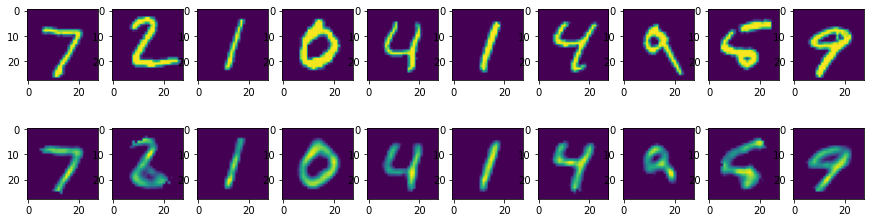

In [0]:
out1 = model.predict(x_test)
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out1[i].reshape(28,28))

plt.show()

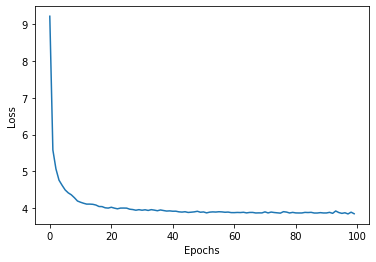

In [0]:
plt.plot(range(100), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Prediction for 2 hidden layer model

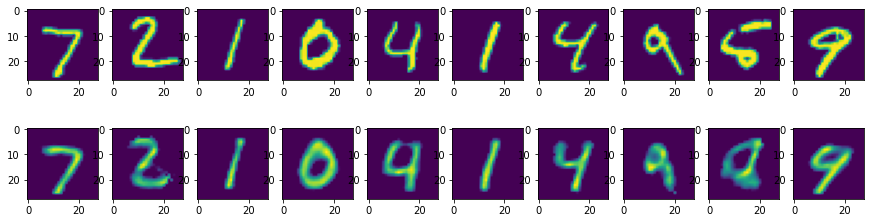

In [0]:
out2 = model2.predict(x_test)
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out2[i].reshape(28,28))

plt.show()

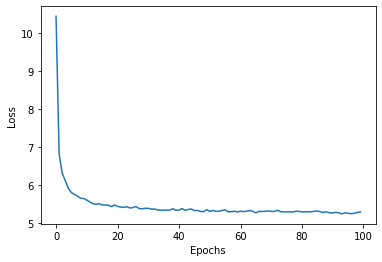

In [0]:
plt.plot(range(100), model2.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Predictions for 3 hidden layer Model

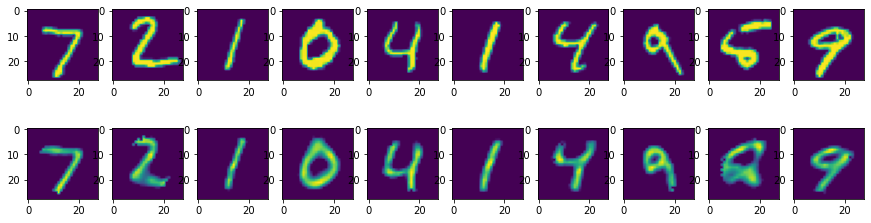

In [0]:
out3 = model3.predict(x_test)
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out3[i].reshape(28,28))

plt.show()

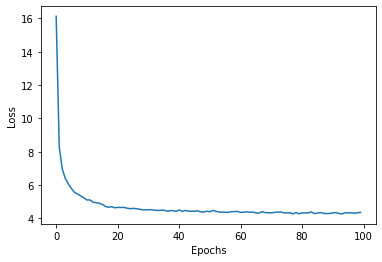

In [0]:
plt.plot(range(100), model3.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

From the Model Loss and Predictions, it can be noticed that the model with 3 hidden layer is performing the best. Since we are reducing the size of the layer. Since the dimensions decrease the data loss while decoding is also more. Thus, accuracy is better for 1 hidden layer model in this case.

## **CNN models**

**Prepare the Data Set**

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

**Implementing Baisc CNN Model**

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

basic_autoencoder = tf.keras.models.Model(input_img, decoded)
basic_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
basic_autoencoder.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 4, 4, 8)           0  

In [0]:
basic_autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6863 - val_loss: 0.6847
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.6825 - val_loss: 0.6797
Epoch 3/100
469/469 [==============================] - 3s 5ms/step - loss: 0.6757 - val_loss: 0.6707
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.6619 - val_loss: 0.6498
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.6219 - val_loss: 0.5797
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.5207 - val_loss: 0.4873
Epoch 7/100
469/469 [==============================] - 3s 5ms/step - loss: 0.4750 - val_loss: 0.4720
Epoch 8/100
469/469 [==============================] - 2s 5ms/step - loss: 0.4615 - val_loss: 0.4593
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.4492 - val_loss: 0.4470
Epoch 10/100
469/469 [==============================] - 2s 5ms/step - loss: 0.4368 - val_lo

In [0]:
out_img = basic_autoencoder.predict(x_test)

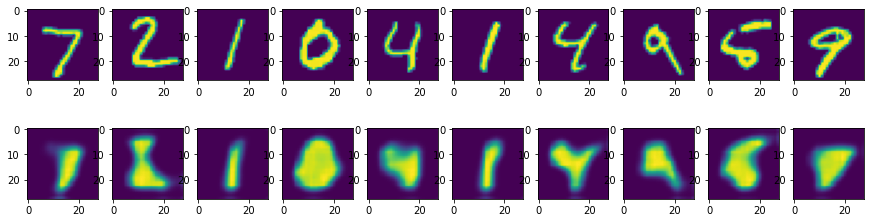

In [0]:
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out_img[i].reshape(28,28))

plt.show()

**Implementing Complex CNN Model**
Added another convolutional layer to the base model. The code will be now of the dimension 2x2x8. The model is trained on 100 epochs and the accuracy is tested

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
#(2,2,8)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded) #(2,2,8)
x = tf.keras.layers.UpSampling2D((2, 2))(x) #(4,4,8)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x) #(4,4,16)
x = tf.keras.layers.UpSampling2D((2, 2))(x) #(8,8,16)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x) #(8,8,32)
x = tf.keras.layers.UpSampling2D((2, 2))(x) #(16,16,32)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

complex_autoencoder = tf.keras.models.Model(input_img, decoded)
complex_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
complex_autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 8)           0   

In [0]:
complex_autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6894 - val_loss: 0.6872
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6839 - val_loss: 0.6799
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6729 - val_loss: 0.6635
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6415 - val_loss: 0.6055
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5313 - val_loss: 0.4800
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4675 - val_loss: 0.4643
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4530 - val_loss: 0.4493
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4369 - val_loss: 0.4310
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4156 - val_loss: 0.4052
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3868 - val_lo

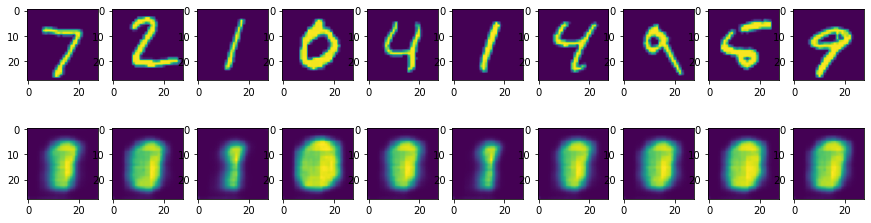

In [0]:
out_img2 = complex_autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out_img2[i].reshape(28,28))

plt.show()

**Optimizing Complex CNN Model**

> Some additional tweaking is performed on the complex CNN model to optimize it. The changes are as follows:
1) Changed the Kernel size to 5 x 5.
2) Dense layer is added at the end of encoder and beginning of the decoder
3) optimizer is changed from adadelta to adam
4) batch normalization is performed both on the encoder and the decoder.





In [0]:
# CNN Complex optimization
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (5, 5), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
bnd = tf.keras.layers.BatchNormalization()(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(bnd)
encoded_dense = tf.keras.layers.Dense(64, activation=tf.nn.relu)(encoded)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Dense(64, activation=tf.nn.relu)(encoded_dense)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
bnd = tf.keras.layers.BatchNormalization()(x)
decoded = tf.keras.layers.Conv2D(1, (5, 5), activation='sigmoid', padding='same')(bnd)

optim_autoencoder = tf.keras.models.Model(input_img, decoded)
optim_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
optim_autoencoder.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 14, 14, 8)         3208      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 7, 7, 8)           1608      
_________________________________________________________________
batch_normalization_14 (Batc (None, 7, 7, 8)           32  

In [0]:
optim_autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1866 - val_loss: 0.1329
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1164 - val_loss: 0.1129
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1074 - val_loss: 0.1035
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1029 - val_loss: 0.1001
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0993 - val_loss: 0.0997
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0962 - val_loss: 0.0941
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0944 - val_loss: 0.0942
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0925 - val_loss: 0.0900
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0911 - val_loss: 0.0914
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0901 - val_lo

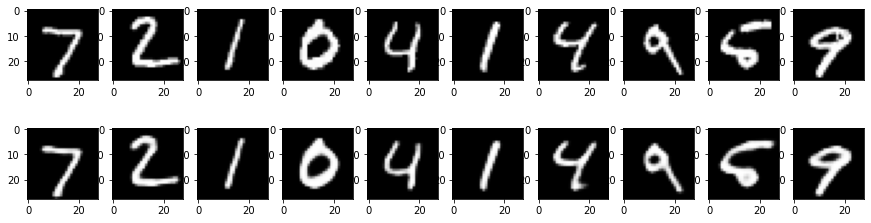

In [0]:
out_img3 = optim_autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out_img3[i].reshape(28,28))

plt.show()

## **Model Comparisions**

****Dense Layer Model Comparisons****

Number of Hidden Layers | Loss
--|--
1 | 3.84
2 | 5.28
3 | 4.10 

*****Discussion*****

> From the above table of the Dense layer models we can see the basic model with 1 hidden layer is performing the best. In the models where we are increasing the number of layers and reducing the dimension of the code, thus there is loss of data and hence the accuracy drops. The MSE method is used to calculate the loss.

****CNN Model Comparisons****

Model Type | Loss
--|--
Base model | 20.54
Complex Model | 24.4
Optimized Model | 7.34

*****Discussion*****
> From the above table we can see that the Optimized model is performing the best with around 92% accuracy. Initially it was noticed that the base model was not performing well as the aacuracy was around 79% and n increasing the number of convolutional layers from base model to the Complex model, it was noticed that the accuracy dropped even further. Thus optimization were done on the base model itself, like adding a dense layer to encoder and decoder, changing the optimizer form "adadelta" to "adam", adding batch optimizer to both encoder and decoder. The optimizations on the base model enabled the accuracy to improve from 79% to 92%. The binary cross entropy is used to calculate the loss.

****Overall Comparison****
> Since, all the 6 models are based on different Loss measuring techniqes and different optimizers therefore, it will be not right to compare them based on their losses. However if we compare the results based on the prediction images, we can see that the predicted images produced by the CNN optimized model is very clear and performs better than all the other 5 models. This result aligns with the fact that CNN performs better for image recognition. Therefore, we can say that the CNN model is the best model in this case.







# **Assignment Part 2**

## **De Noising Auto encoder**

In [32]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

x_train_noisy_buffer = x_train_noisy
x_test_noisy_buffer = x_test_noisy

x_train_noisy = np.reshape(x_train_noisy, (x_train_noisy.shape[0], 784))
x_train_noisy = x_train_noisy.astype(np.float32)
x_test_noisy = np.reshape(x_test_noisy, (x_test_noisy.shape[0], 784))

noisy_train_ds = tf.data.Dataset.from_tensor_slices(x_train_noisy).batch(256)

x_train_ann = x_train_noisy
x_test_ann = x_test_noisy

x_train_noisy = x_train_noisy_buffer
x_test_noisy = x_test_noisy_buffer

#x_test_ann.shape
#x_train_noisy.shape

(10000, 784)

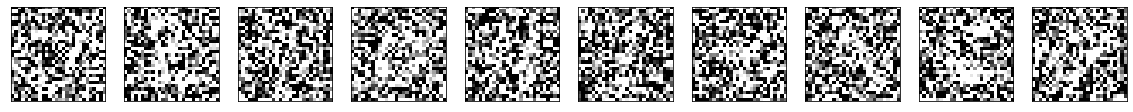

In [0]:
# Plot figures to show what the noisy digits look like
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Training noisy data on the multi layer dense model

In [29]:
annAutoEncoder = Autoencoder_three(intermediate_dim=256, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(annAutoEncoder, opt, loss, noisy_train_ds, 100)

Epoch 1/100. Loss: 715.4505615234375
Epoch 2/100. Loss: 51.26775360107422
Epoch 3/100. Loss: 51.26337814331055
Epoch 4/100. Loss: 51.25586700439453
Epoch 5/100. Loss: 51.88602066040039
Epoch 6/100. Loss: 49.83430480957031
Epoch 7/100. Loss: 49.643184661865234
Epoch 8/100. Loss: 49.535003662109375
Epoch 9/100. Loss: 49.520809173583984
Epoch 10/100. Loss: 49.503387451171875
Epoch 11/100. Loss: 49.486568450927734
Epoch 12/100. Loss: 49.39370346069336
Epoch 13/100. Loss: 49.37945556640625
Epoch 14/100. Loss: 49.29963302612305
Epoch 15/100. Loss: 49.289093017578125
Epoch 16/100. Loss: 49.208988189697266
Epoch 17/100. Loss: 49.198150634765625
Epoch 18/100. Loss: 49.19641876220703
Epoch 19/100. Loss: 49.13013458251953
Epoch 20/100. Loss: 49.080665588378906
Epoch 21/100. Loss: 49.0814208984375
Epoch 22/100. Loss: 49.005455017089844
Epoch 23/100. Loss: 49.00253677368164
Epoch 24/100. Loss: 48.976234436035156
Epoch 25/100. Loss: 48.92660140991211
Epoch 26/100. Loss: 48.86335372924805
Epoch 27/10

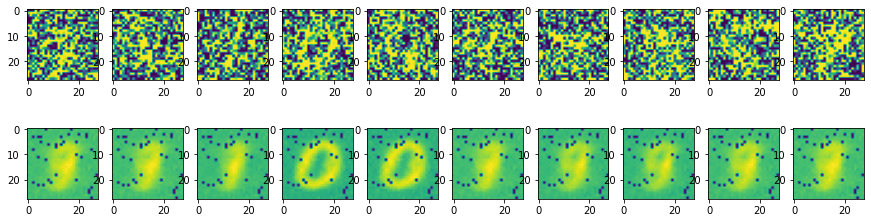

In [33]:
ann_out_img_noisy = annAutoEncoder.predict(x_test_ann)
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test_ann[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(ann_out_img_noisy[i].reshape(28,28))

plt.show()

De noising using basic CNN model

In [0]:
basic_autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.3274 - val_loss: 0.3148
Epoch 2/100
469/469 [==============================] - 3s 5ms/step - loss: 0.3050 - val_loss: 0.2973
Epoch 3/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2902 - val_loss: 0.2860
Epoch 4/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2813 - val_loss: 0.2787
Epoch 5/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2755 - val_loss: 0.2742
Epoch 6/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2722 - val_loss: 0.2716
Epoch 7/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2701 - val_loss: 0.2698
Epoch 8/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2686 - val_loss: 0.2685
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2676 - val_loss: 0.2676
Epoch 10/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2668 - val_lo

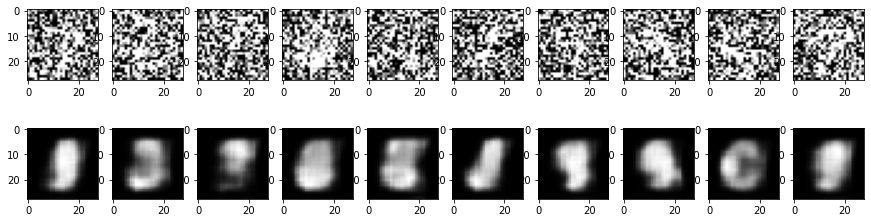

In [0]:
basic_out_img_noisy = basic_autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(basic_out_img_noisy[i].reshape(28,28))

plt.show()

In [0]:
optim_autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1963 - val_loss: 0.2111
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1768 - val_loss: 0.1724
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1725 - val_loss: 0.1715
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1699 - val_loss: 0.1674
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1682 - val_loss: 0.1722
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1670 - val_loss: 0.1655
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1660 - val_loss: 0.1670
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1652 - val_loss: 0.1638
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1646 - val_loss: 0.1663
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1641 - val_lo

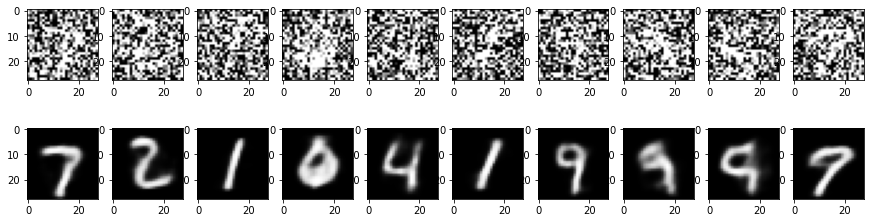

In [0]:
optim_out_img_noisy = optim_autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(optim_out_img_noisy[i].reshape(28,28))

plt.show()

## **Model Comparisons**


*****Model Performance Table*****

Model | loss
--|--
Multiple Dense layer Model | 45.791
Basic CNN Model | 24.46
Optimized CNN Model | 15.60

****Discussion****


> The above table records the loss in each type of model. However, we cannot compare these losses as the metrics used to calculate these losses is different for different models. However, if we look at the prediction result images, we can clearly tell that the optimized CNN model is performing the best as compared to the other models. This result aligns with the result observed in part 1 of the assignment.

